In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/credit_data.csv')
data=data.dropna()

In [ ]:
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [ ]:
data.shape

(284807, 31)

In [ ]:
x=data.drop(columns='Class')
y=data['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,train_size=0.25)

# create a model

In [ ]:
y.shape

(284807,)

In [ ]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
import numpy as np
print(np.any(np.isnan(x_train)))
print(np.any(np.isnan(y_train)))

False
False


In [ ]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52498,45482.0,-0.858635,0.585280,1.575453,1.317886,-0.859977,0.034382,-0.399611,0.728113,0.236395,...,-0.238132,0.084815,0.242744,-0.116741,0.514606,-0.027191,-0.295761,-0.157314,-0.031149,19.54
273542,165614.0,-0.022716,-1.090718,0.347754,-3.209641,-0.335555,0.543510,-0.389128,0.244854,-1.717714,...,-0.233328,-0.224860,-0.540943,0.424634,-0.465743,-1.287637,-0.737894,0.220329,0.248860,97.99
276767,167288.0,0.128172,0.911766,-0.680246,-0.819493,1.335271,-0.057583,0.797571,0.128689,-0.206186,...,0.027674,-0.332611,-0.856747,0.009476,-0.227400,-0.384356,0.144261,0.218105,0.066232,1.79
129555,79133.0,-1.926447,0.700395,1.206153,0.624355,0.132835,-1.113698,0.185074,0.175427,-0.683115,...,-0.375002,-0.264376,-0.649828,0.348864,0.353459,0.165969,0.221926,-0.352566,-0.007488,1.98
4758,4208.0,-0.924370,0.635268,2.424534,-0.980228,-0.250123,-0.203216,0.013086,0.248369,1.225108,...,0.058290,-0.144165,-0.265227,-0.208657,-0.036375,0.060463,0.838448,0.169760,0.101467,15.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223802,143530.0,-0.308167,1.591107,-1.373583,0.038114,0.037260,-1.002515,-0.659082,-2.430258,-0.279426,...,0.315747,-0.946215,1.263171,0.123609,-0.076179,-0.373384,-0.166019,-0.106544,-0.010175,1.50
158375,111144.0,0.027415,0.938860,-0.137347,-0.411764,1.018753,-0.009943,0.651933,0.005686,1.282204,...,-0.034821,0.200071,0.979758,-0.281001,0.024118,-0.393095,-0.451948,0.454234,0.267469,1.00
75075,55887.0,-1.562455,0.443862,1.011390,0.032803,0.550616,-0.491726,0.308602,0.161854,-0.125248,...,-0.243460,-0.335385,-0.472779,0.564785,-0.056079,-0.104507,0.103312,0.264616,0.082446,0.99
203423,134811.0,-2.415369,1.742191,0.578007,0.408996,-0.995119,1.858211,-0.445551,0.743951,0.661218,...,0.167682,-0.014133,0.300680,-0.310377,-0.327008,0.176959,0.001773,-1.369533,-0.601018,105.54


In [ ]:
def standardize(train, test):


    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test
x_train,x_test=standardize(x_train,x_test)

In [ ]:
# model create

model=tf.keras.Sequential(
                          [tf.keras.layers.Dense(68,activation='LeakyReLU'),
                          tf.keras.layers.Dense(34,activation='LeakyReLU'),
                           tf.keras.layers.Dense(12,activation='LeakyReLU'),
                          tf.keras.layers.Dense(1,activation='sigmoid')]

                          )

#model compile

model.compile(optimizer='adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
2226/2226 [==============================] - 28s 12ms/step - loss: 0.0100 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/15
2226/2226 [==============================] - 17s 7ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 3/15
2226/2226 [==============================] - 27s 12ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/15
2226/2226 [==============================] - 27s 12ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/15
2226/2226 [==============================] - 17s 7ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/15
2226/2226 [==============================] - 17s 7ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/15
2226/2226 [==============================] - 27s 12ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0036 - va

In [ ]:
model.evaluate(x_test,y_test)

420/420 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9958


[nan, 0.995758593082428]

# non linear activation function

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(x))

In [ ]:
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9,-1,-2,-3,-4,-5,-6,-7,-8,-9],dtype=np.float32)

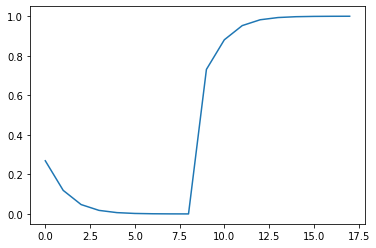

In [ ]:
import matplotlib.pyplot as pt

pt.plot(sigmoid(a))

In [ ]:
def relu(x):
  return np.where(x<0,0,x)

In [ ]:
relu(a)

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

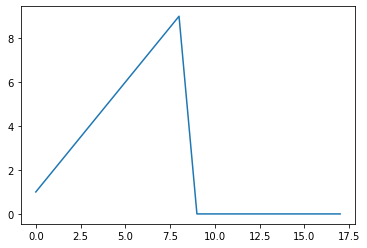

In [ ]:
pt.plot(relu(a))

In [ ]:
# linearactivation function
def linear(A):
  return A

In [ ]:
linear(a)==a # does not change anything our data

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])